In [36]:
import io
import numpy as np
import pandas as pd
import scipy
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import files
uploaded = files.upload()


Saving wine.csv to wine.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['wine.csv']))
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Class
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [4]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [6]:
print(X)

[[1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 ... 8.600e-01 3.450e+00 1.480e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [7]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [39]:
df_nor = preprocessing.normalize(df)
df_nor = pd.DataFrame(df_nor)
df_nor

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336,0.000948
1,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996175,0.000841
2,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961,0.000674
3,0.017775,0.003477,0.003853,0.028193,0.158417,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986752,0.001343
4,0.009763,0.001210,0.001684,0.010450,0.077002,0.002248,0.002331,0.000234,0.001354,0.004641,0.000722,0.001959,0.996907,0.000688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.018364,0.007568,0.003282,0.027459,0.127251,0.002250,0.000817,0.000697,0.001420,0.010314,0.000857,0.002331,0.991217,0.004018
173,0.017691,0.005162,0.003274,0.030366,0.134665,0.002376,0.000990,0.000568,0.001862,0.009638,0.000924,0.002060,0.990186,0.003961
174,0.015723,0.005071,0.002678,0.023697,0.142179,0.001884,0.000818,0.000509,0.001600,0.012085,0.000699,0.001848,0.989330,0.003554
175,0.015514,0.003051,0.002792,0.023559,0.141354,0.001944,0.000801,0.000624,0.001720,0.010955,0.000707,0.001908,0.989476,0.003534


In [5]:
corr_matrix = df.corr()

In [31]:
'''
corr : +1 -> Pos relationship
       -1 -> Neg Rel
        0 -> no reln

P value : 
p < 0.001 -> strong certainty in the result
p < 0.05 -> moderate
p < 0.1 -> weak
p > 0.1 -> no certainty

strong corr:

corr coeff: close to -1 or 1 
p value less than 0.001
'''

pearson_coef, p_value = stats.pearsonr(df['Alcohol'],df['Wine Class'])
print(pearson_coef, p_value)

-0.32123754922324005 1.3028895482526406e-05


In [ ]:
sb.regplot(x='Alcohol',y='Wine Class',data=df)
plt.ylim(0,)

In [ ]:
sb.regplot(x='Malic acid',y='Wine Class',data=df)
plt.ylim(0,)

In [ ]:
sb.regplot(x='Ash',y='Wine Class',data=df)
plt.ylim(0,)

In [ ]:
sb.regplot(x='Magnesium',y='Wine Class',data=df)
plt.ylim(0,)

In [ ]:
sb.regplot(x='Proanthocyanins',y='Wine Class',data=df)
plt.ylim(0,)

In [ ]:
sb.regplot(x='Color intensity',y='Wine Class',data=df)
plt.ylim(0,)

In [ ]:
sb.regplot(x='OD280/OD315 of diluted wines',y='Wine Class',data=df)
plt.ylim(0,)

In [ ]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
f, ax = plt.subplots(figsize=(10,10)) 
heatmap = sb.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                     cbar_kws = {'shrink': .4},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 8})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 45)
ax.set_xticklabels(corr_matrix.columns)
sb.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
ax = sb.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

##Using Normalized Values


In [43]:
# using normalized values

corr_matrix_nor = df_nor.corr()
pearson_coef, p_value = stats.pearsonr(df_nor.iloc[0],df_nor.iloc[-1])
print(pearson_coef, p_value)

0.9968895718575445 1.2987232111649874e-14


In [ ]:
mask = np.zeros_like(corr_matrix_nor, dtype=np.bool)
f, ax = plt.subplots(figsize=(10,10)) 
heatmap = sb.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                     cbar_kws = {'shrink': .4},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 8})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 45)
ax.set_xticklabels(corr_matrix.columns)
sb.set_style({'xtick.bottom': True}, {'ytick.left': True})

(0.0, 4.025705429260425)

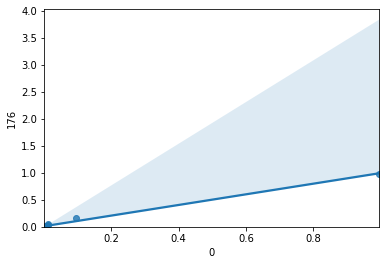

In [45]:
sb.regplot(x=df_nor.iloc[0],y=df_nor.iloc[-1],data=df)
plt.ylim(0,)

(0.0, 1.6070283584623306)

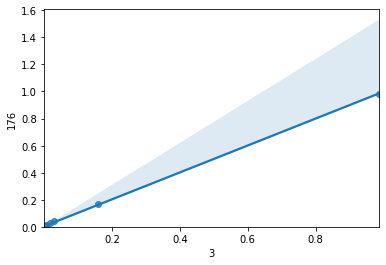

In [48]:
sb.regplot(x=df_nor.iloc[3],y=df_nor.iloc[-1],data=df)
plt.ylim(0,)